In [ ]:
# Google Colab에서 Kaggle API를 사용하기 위한 라이브러리 설치
!pip install kaggle

# Kaggle API 토큰 업로드
from google.colab import files
files.upload()

In [30]:
# Kaggle API 토큰을 사용자 디렉토리로 복사하고 권한 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [31]:
# Kaggle에서 데이터셋 다운로드
!kaggle datasets download -d hetulmehta/website-classification

website-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
# 다운로드한 데이터셋 압축 해제
!unzip website-classification.zip

Archive:  website-classification.zip
replace website_classification.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [34]:
# 필요한 라이브러리 및 모듈 로드
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [35]:
# 데이터 로드 및 전처리
wc_data = pd.read_csv('website_classification.csv')
# 'Streaming Services' 카테고리를 1로, 다른 카테고리를 0으로 변환
wc_data['Outlook'] = (wc_data['Category'] == 'Streaming Services').astype(int)
# 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(wc_data['cleaned_website_text'], wc_data['Outlook'], test_size=0.2, random_state=42)

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [10]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-01-25 16:45:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-01-25 16:45:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-01-25 16:45:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [11]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [12]:
!ls
!pwd

glove.6B.100d.txt  glove.6B.50d.txt  sample_data
glove.6B.200d.txt  glove.6B.zip      website_classification.csv
glove.6B.300d.txt  kaggle.json	     website-classification.zip
/content


In [13]:
import os

file_path = 'glove.6B.50d.txt'

if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does not exist. Please check the path.")

The file 'glove.6B.50d.txt' exists.


In [14]:
import os

print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [36]:
from gensim.models import KeyedVectors

# GloVe 워드 임베딩 모델 로드
glove_model = KeyedVectors.load_word2vec_format('glove.6B.50d.txt', binary=False, no_header=True)

In [37]:
# 텍스트 데이터 토큰화
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(wc_data['cleaned_website_text'])
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [38]:
# 시퀀스를 고정 길이로 패딩
max_len = 100
X_train_padded = pad_sequences(X_train_tokens, maxlen=max_len)
X_test_padded = pad_sequences(X_test_tokens, maxlen=max_len)

In [39]:
# 토큰을 워드 임베딩 벡터로 변환
X_train_vectors = np.zeros((len(X_train_padded), max_len, 50))
X_test_vectors = np.zeros((len(X_test_padded), max_len, 50))

# 정수 인덱스를 단어로 변환하기 위한 역 매핑
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}

# 훈련 데이터에 대한 워드 임베딩 벡터 생성
for i, seq in enumerate(X_train_padded):
    for j, index in enumerate(seq):
        word = reverse_word_index.get(index, '')  # 인덱스에 해당하는 단어 가져오기
        if word in glove_model:
            X_train_vectors[i][j] = glove_model[word]

# 테스트 데이터에 대한 워드 임베딩 벡터 생성
for i, seq in enumerate(X_test_padded):
    for j, index in enumerate(seq):
        word = reverse_word_index.get(index, '')  # 인덱스에 해당하는 단어 가져오기
        if word in glove_model:
            X_test_vectors[i][j] = glove_model[word]

In [19]:
# 워드 임베딩 매트릭스 생성
embedding_dim = 50
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in glove_model:
        embedding_matrix[i] = glove_model[word]

In [20]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [21]:
import tensorflow as tf

# GPU 사용 가능 여부 확인
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("TensorFlow-GPU is available and configured.")
else:
    print("No GPU detected. TensorFlow will use CPU.")

TensorFlow-GPU is available and configured.


In [22]:
# TensorFlow 업그레이드
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten

# LSTM 기반 신경망 모델 생성
model = Sequential()

# LSTM 레이어 추가
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(max_len, embedding_dim)))

# 이진 분류를 위한 Dense 레이어 추가
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 91777 (358.50 KB)
Trainable params: 91777 (358.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# 모델 훈련
model.fit(X_train_vectors, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
29/29 [==============================] - 27s 435ms/step - loss: 0.3280 - accuracy: 0.9189 - val_loss: 0.2760 - val_accuracy: 0.9204
Epoch 2/10
29/29 [==============================] - 8s 274ms/step - loss: 0.2613 - accuracy: 0.9233 - val_loss: 0.2654 - val_accuracy: 0.9204
Epoch 3/10
29/29 [==============================] - 8s 274ms/step - loss: 0.2309 - accuracy: 0.9244 - val_loss: 0.2491 - val_accuracy: 0.9248
Epoch 4/10
29/29 [==============================] - 7s 249ms/step - loss: 0.1986 - accuracy: 0.9356 - val_loss: 0.1662 - val_accuracy: 0.9513
Epoch 5/10
29/29 [==============================] - 8s 288ms/step - loss: 0.1560 - accuracy: 0.9433 - val_loss: 0.2646 - val_accuracy: 0.9248
Epoch 6/10
29/29 [==============================] - 8s 277ms/step - loss: 0.2041 - accuracy: 0.9244 - val_loss: 0.2139 - val_accuracy: 0.9204
Epoch 7/10
29/29 [==============================] - 7s 244ms/step - loss: 0.1501 - accuracy: 0.9522 - val_loss: 0.1833 - val_accuracy: 0.9381
Epoch

In [25]:
# 테스트 및 평가
loss, accuracy = model.evaluate(X_test_vectors, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

9/9 [==============================] - 0s 31ms/step - loss: 0.1224 - accuracy: 0.9645
Test Loss: 0.1224, Test Accuracy: 0.9645


Epoch 1/10
29/29 [==============================] - 8s 277ms/step - loss: 0.0967 - accuracy: 0.9689 - val_loss: 0.1669 - val_accuracy: 0.9248
Epoch 2/10
29/29 [==============================] - 8s 287ms/step - loss: 0.0949 - accuracy: 0.9711 - val_loss: 0.1886 - val_accuracy: 0.9336
Epoch 3/10
29/29 [==============================] - 7s 244ms/step - loss: 0.1134 - accuracy: 0.9622 - val_loss: 0.1740 - val_accuracy: 0.9381
Epoch 4/10
29/29 [==============================] - 8s 271ms/step - loss: 0.0689 - accuracy: 0.9789 - val_loss: 0.1722 - val_accuracy: 0.9336
Epoch 5/10
29/29 [==============================] - 8s 261ms/step - loss: 0.0585 - accuracy: 0.9778 - val_loss: 0.1883 - val_accuracy: 0.9425
Epoch 6/10
29/29 [==============================] - 7s 251ms/step - loss: 0.0626 - accuracy: 0.9800 - val_loss: 0.2030 - val_accuracy: 0.9248
Epoch 7/10
29/29 [==============================] - 8s 272ms/step - loss: 0.0560 - accuracy: 0.9833 - val_loss: 0.1732 - val_accuracy: 0.9425
Epoch 

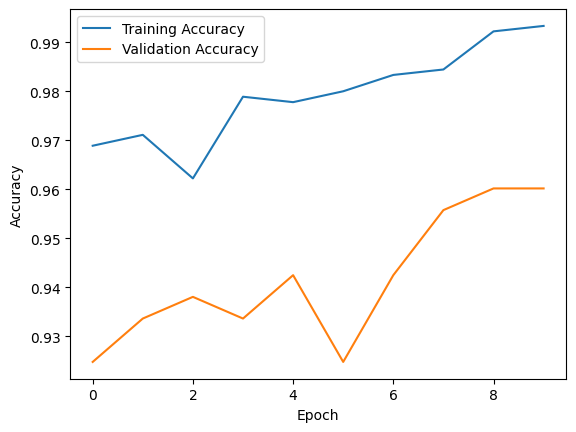

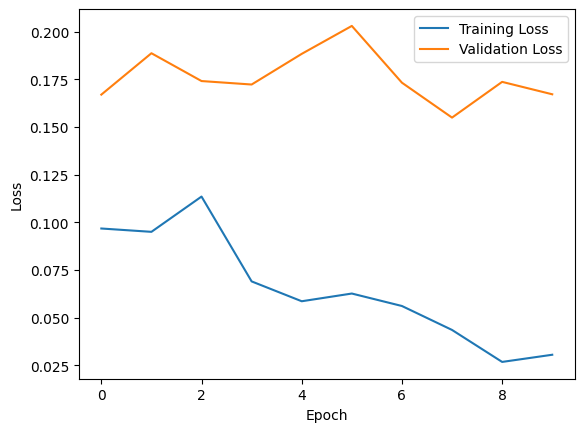

In [26]:
import matplotlib.pyplot as plt

# 훈련 기록 시각화
history = model.fit(X_train_vectors, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 훈련 정확도 및 검증 정확도 그래프
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 훈련 손실 및 검증 손실 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

9/9 [==============================] - 0s 30ms/step


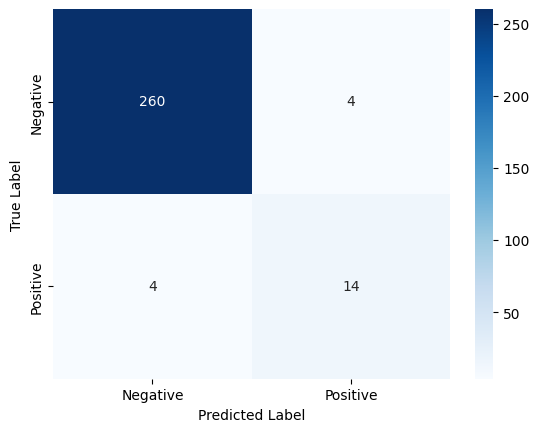

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 혼동 행렬 시각화
predictions = model.predict(X_test_vectors)
y_pred = (predictions > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

9/9 [==============================] - 0s 29ms/step


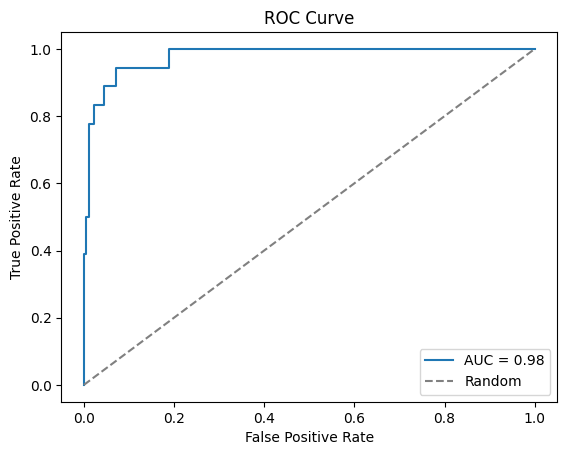

In [28]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 및 AUC 시각화
predictions = model.predict(X_test_vectors)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()